\begin{equation*}
{\frac{\partial}{\partial t}f(x, t) = \frac{\partial^2}{\partial x^2}f(x, t)}
\end{equation*}

\begin{equation*}
f(x, 0) = exp(x^{-2})
\end{equation*}

In [171]:
import numpy as np
from scipy.integrate import odeint

def equation(f, N, L, t=0):
    dx = L / N
    arr = np.gradient(np.gradient(f, dx), dx)

    return arr

In [172]:
def f(x):
    return np.exp(-x**2)

In [176]:
# initial parameter(optional)
N, L = 200, 40

# coordinate
q = np.linspace(-L/2, L/2, N)

# initial value for each fk
fk_0 = f(q)

# time
t_max, t_div = 1000, 50
t = np.linspace(0.0001, t_max, t_div) #(0, t_max, t_div は怒られる)

trajectories = odeint(equation, fk_0, t, args=(N, L))

In [177]:
import matplotlib.pyplot as plt

type(fig): <class 'matplotlib.figure.Figure'>
type(fig): <class 'matplotlib.axes._subplots.AxesSubplot'>


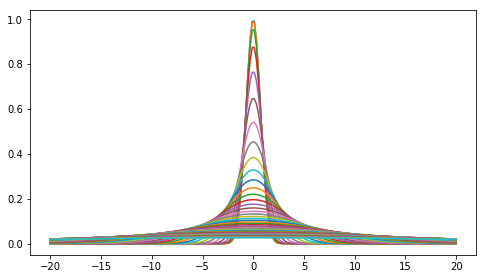

In [178]:
#グラフ描写
#1 Figureのインスタンス作成
fig = plt.figure(figsize=(8,4.5))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
print("type(fig): {}".format(type(ax1)))

#3 データを渡してプロット
for i in range(len(trajectories)):
    ax1.plot(q, trajectories[i])

#ax2.plot(x, trajectories)



固体内拡散に関するPDE/Govenig equation
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right)
\end{equation*}

In [137]:
import numpy as np
from scipy.integrate import odeint

def equation_2(f, N, L, t=0):
    dx = L / N #離散化
    arr = 3/(N**2)*np.gradient(N**2*np.gradient(f, dx), dx)  #ここに任意の関数を入れられる。

    return arr

In [138]:
def f(r):
    return 1/r

In [139]:
# initial parameter(optional)
N, L = 200, 40

# coordinate
q = np.linspace(0.001, L, N) #?

# time
t_max, t_div = 1000, 10
t = np.linspace(0.0001, t_max, t_div) #tの離散化(0, t_max, t_div は怒られる)

# initial value for each fk
fk_0 = f(q)

trajectories_2 = odeint(equation_2, fk_0, t, args=(N, L))

type(fig): <class 'matplotlib.figure.Figure'>
type(fig): <class 'matplotlib.axes._subplots.AxesSubplot'>


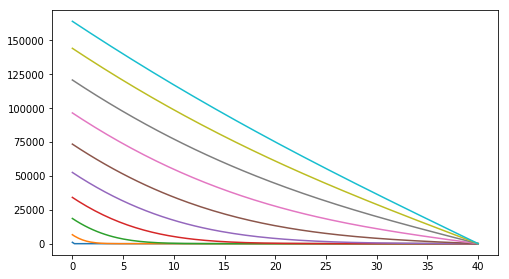

In [140]:
#グラフ描写
#1 Figureのインスタンス作成
fig = plt.figure(figsize=(8,4.5))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
print("type(fig): {}".format(type(ax1)))

#3 データを渡してプロット
for i in range(len(trajectories_2)):
    ax1.plot(q, trajectories_2[i])

#ax2.plot(x, trajectories)

In [144]:
import numpy as np
from scipy.integrate import odeint

def equation_3(f, N, L, t=0):
    dx = L / N #離散化
    arr = 3/(N**2)*np.gradient(N**2*np.gradient(f, dx), dx) + N #ここに任意の関数を入れられる。

    return arr

In [145]:
def f(r):
    return 1/r

In [146]:
# initial parameter(optional)
N, L = 200, 40

# coordinate
q = np.linspace(0.001, L, N) #?

# time
t_max, t_div = 1000, 10
t = np.linspace(0.0001, t_max, t_div) #tの離散化(0, t_max, t_div は怒られる)

# initial value for each fk
fk_0 = f(q)

trajectories_3 = odeint(equation_3, fk_0, t, args=(N, L))

type(fig): <class 'matplotlib.figure.Figure'>
type(fig): <class 'matplotlib.axes._subplots.AxesSubplot'>


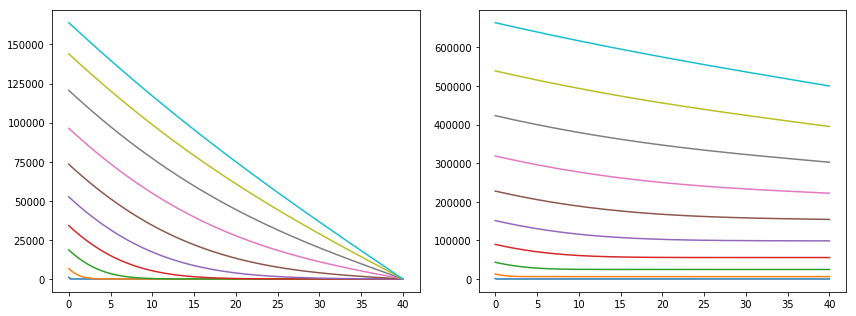

In [150]:
#グラフ描写
#1 Figureのインスタンス作成
fig = plt.figure(figsize=(12,4.5))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)
print("type(fig): {}".format(type(ax1)))

#3 データを渡してプロット
for i in range(len(trajectories_2)):
    ax3.plot(q, trajectories_2[i])

for i in range(len(trajectories_3)):
    ax4.plot(q, trajectories_3[i])

fig.tight_layout() #かぶり
    
#ax2.plot(x, trajectories)

固体内拡散に関するPDE/Govenig equation
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right)
\end{equation*}

境界条件
\begin{equation*}
\frac{\partial C_s}{\partial r} \vert _{r=r_i} = 0 \\
- D_s\frac{\partial C_s}{\partial r} \vert _{r=r_0} = \frac{J_{Li}}{a_sF} \\
\end{equation*}

about J_Li
\begin{equation*}
J_{Li} = \frac{I}{A}.....\tt{(constant)}
\end{equation*}

In [ ]:
"""
変数をいい感じにする。
関数f(q)に任意の初期条件(array)を入力する
"""

In [164]:
# モジュール
import numpy as np
from scipy.integrate import odeint


In [165]:
#TO DO
#グリッドの設定 (x軸を設定)
L = 10 #グリッドの長さ
N = 1000 #グリッドの分割数
x = np.linspace(0.001, L, N) # npメソッドでグリッド作成 (start, stop, num = 50) 


In [166]:
#解きたい微分方程式のインプット
def equation_4(f, N, L, t=0):
    dx = L / N #離散化
    arr = 10/(dx**2)*np.gradient(dx**2*np.gradient(f, dx), dx) #ここに任意の関数を入れられる。
    return arr

In [167]:
#初期値の設定
#numpyで行列をつくる
fk_0 = 1/np.linspace(0.001, L, N)
#fk_0 = np.zeros(0, L, N) #つくったグリッド(x)から(x, uに拡張)
#fk_0 = 3 #初期
#fk_0 = 1 #作成した行列の最後だけ任意の値にする 

In [168]:
# time
t_max, t_div = 1000, 10
t = np.linspace(0.0001, t_max, t_div) #tの離散化(0, t_max, t_div は怒られる)

In [169]:
#実行部
trajectories_4 = odeint(equation_4, fk_0, t, args=(N, L))

type(fig): <class 'matplotlib.figure.Figure'>


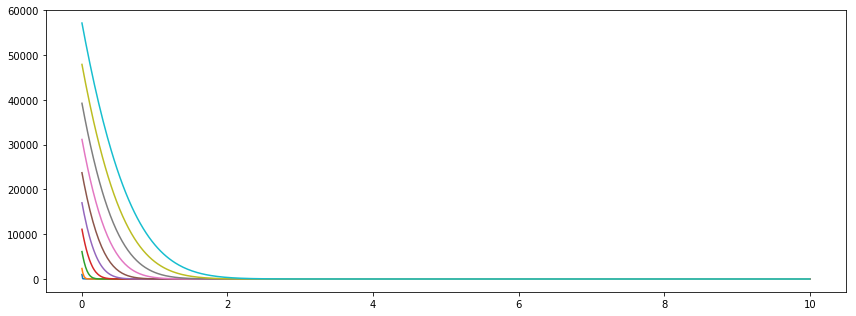

In [170]:
#グラフ描写
#1 Figureのインスタンス作成
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4.5))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
#ax3 = fig.add_subplot(121)
ax5 = fig.add_subplot(111)

#3 データを渡してプロット
#for i in range(len(trajectories_2)):
#    ax3.plot(q, trajectories_2[i])

for i in range(len(trajectories_4)):
    ax5.plot(x, trajectories_4[i])

fig.tight_layout() #かぶり
    
#ax2.plot(x, trajectories)

NameError: name 'arr' is not defined

In [158]:
#4 y軸範囲の調整とグラフタイトル・ラベル付け
#ax1.set_ylim(-1.3, 1.3)
#ax2.set_ylim(-1.3, 1.3)

ax1.set_title("sin x")
ax2.set_title("cos x")

ax1.set_xlabel("x")
ax2.set_xlabel("x")

ax1.set_ylabel("y")
ax2.set_ylabel("y")

fig.tight_layout() #かぶり

NameError: name 'ax1' is not defined